In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [3]:
url = "https://raw.githubusercontent.com/Prodigy-InfoTech/data-science-datasets/main/Task%203/bank/bank.csv"
df = pd.read_csv(url, sep=';')

In [4]:
print("Shape of dataset:", df.shape)
print("First 5 rows:")
print(df.head())

Shape of dataset: (4521, 17)
First 5 rows:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [5]:
data = pd.get_dummies(df, drop_first=True)

In [6]:
X = data.drop("y_yes", axis=1)
y = data["y_yes"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
y_pred = model.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8806629834254144


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
cm = confusion_matrix(y_test, y_pred)
print("✅ Confusion Matrix:\n", cm)

✅ Confusion Matrix:
 [[748  59]
 [ 49  49]]


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

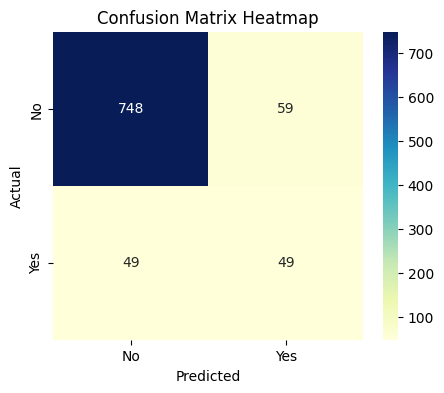

In [16]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()